In [1]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1 = pd.read_csv("consolidated_energies.csv")

In [8]:
soft = open("soft_output.txt", "r")

In [9]:
soft = soft.readlines()

In [13]:
soft = [float(elt.split()[-1]) for elt in soft[1::2]]

In [14]:
soft

[-18.06,
 -23.46,
 -20.9,
 -23.52,
 -23.25,
 -17.12,
 -19.21,
 -19.81,
 -21.2,
 -26.7,
 -21.82,
 -20.75,
 -19.85,
 -21.51,
 -18.31,
 -16.15,
 -18.23,
 -22.42,
 -19.51,
 -19.11,
 -18.36,
 -18.45,
 -17.0,
 -20.26,
 -19.66,
 -19.41,
 -19.49,
 -19.25,
 -23.71,
 -20.8,
 -17.3,
 -20.11,
 -16.8,
 -19.2,
 -18.81,
 -21.61,
 -18.9,
 -18.95,
 -23.45,
 -22.39,
 -21.2,
 -25.7,
 -20.35,
 -20.25,
 -21.15,
 -22.13,
 -19.48,
 -24.54,
 -25.69,
 -21.56,
 -19.65,
 -18.71,
 -19.11,
 -19.69,
 -21.4,
 -18.31,
 -20.15,
 -19.7,
 -24.15,
 -19.25,
 -20.11,
 -18.3,
 -17.37,
 -20.8,
 -19.93,
 -18.2,
 -22.76,
 -20.82,
 -18.21,
 -16.75,
 -19.06,
 -19.96,
 -17.25,
 -19.1,
 -18.15,
 -18.6,
 -20.31,
 -18.6,
 -18.57,
 -21.11,
 -19.3,
 -19.26,
 -19.86,
 -16.76,
 -20.09,
 -19.95,
 -19.75,
 -20.5,
 -19.8,
 -19.15,
 -18.3,
 -18.6,
 -20.26,
 -17.35,
 -19.51,
 -20.61,
 -19.1,
 -15.21,
 -21.31,
 -20.0,
 -16.0,
 -21.66,
 -22.35,
 -19.31,
 -22.71,
 -15.5,
 -17.4,
 -17.91,
 -18.2,
 -22.51,
 -18.86,
 -19.21,
 -17.48,
 -18.9,
 -19.

In [17]:
data1['Soft'] = soft

In [19]:
# Time to load in the data
data = pd.read_csv("data.csv")
energies = pd.read_csv("subopt_attributes.csv")
#energies["Contra"] = contra
energies["sequence"] = energies.Sequence.str.slice(29, -32).str.replace("U", "T")
big_table = pd.merge(energies, data, on='sequence', how="inner")
big_table = pd.merge(big_table, data1, on='Sequence', how="inner")



#columns list needed when we add data later
cols = list(energies.columns)
cols.remove('Sequence')
cols.remove('sequence')

#now we want to add the ABA column to big_table
perfect_sequence = "CCATAGAGAGGTTATCCGCTCA"
PERFECT_KD = big_table[big_table['sequence'] == perfect_sequence].iloc[0]['kd']
PERFECT_SEQ = big_table[big_table['sequence'] == perfect_sequence].iloc[0]['Sequence']
big_table['ABA'] = (big_table.kd/PERFECT_KD).apply(np.log)
big_table.head()

big_table

,mfold_opt,mfold_worst,mfold_mean,mfold_samples,mfold_std,mfold_skew,mfold_median,vienna_opt,vienna_worst,vienna_mean,...,sequence,kd,kd_uncertainty,y_intercept,delta_y,count,Vienna,MFold,Soft,ABA
0,-22.80,-21.10,-22.0000,3,0.697615,2.120729e-01,-22.10,-21.900000,-16.9,-17.643825,...,CCATGGAGAGGTTATCCTCTCA,122.895083,13.091333,32766.432231,69772.0,54,-21.900000,-22.80,-22.80,3.808252
1,-21.47,-21.47,-21.4700,1,0.000000,0.000000e+00,-21.47,-23.900000,-18.9,-19.735792,...,CCATAGAGAGGATCCGCTCA,107.980343,8.922979,33942.450238,69772.0,80,-23.900000,-21.47,-23.96,3.678871
2,-15.80,-15.20,-15.5000,2,0.300000,0.000000e+00,-15.50,-15.500000,-10.5,-11.225309,...,CCATAGAGAGGTTATCCGCCTACA,20.089384,2.577972,30911.226548,69772.0,61,-15.500000,-15.80,-16.55,1.997113
3,-17.67,-17.67,-17.6700,1,0.000000,0.000000e+00,-17.67,-19.500000,-14.5,-15.347548,...,CCATAGATGAGGTTATCCGCTGCA,375.912095,82.837415,31451.395330,69772.0,66,-19.500000,-17.67,-20.15,4.926277
4,-15.99,-15.99,-15.9900,1,0.000000,0.000000e+00,-15.99,-15.700000,-10.7,-11.386458,...,CCATACTCTCCAATAGGGCTCA,335.213224,53.309855,30848.534205,69772.0,74,-15.700000,-15.99,-18.86,4.811688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,-16.90,-16.90,-16.9000,1,0.000000,0.000000e+00,-16.90,-14.000000,-9.0,-9.703939,...,CCATAGTCTCCAATAGGCGTCA,254.946355,38.420898,29977.015875,69772.0,69,-14.000000,-16.90,-18.96,4.537975
4931,-21.90,-18.43,-20.6700,3,1.586464,6.969220e-01,-21.68,-21.600000,-16.6,-17.331557,...,CCATTAGAGAGGTGTATCCGCTCA,79.093299,5.501908,30269.961714,69772.0,59,-21.600000,-21.90,-22.83,3.367550
4932,-17.50,-17.50,-17.5000,1,0.000000,0.000000e+00,-17.50,-17.200001,-12.2,-12.924342,...,CCATAGAGAGGTTTTCCCCTCA,1.686225,0.260718,15796.910223,69772.0,62,-17.200001,-17.50,-18.20,-0.480587
4933,-20.40,-16.93,-18.7825,4,1.537504,6.402186e-02,-18.90,-20.000000,-15.0,-15.724577,...,CCATAGAGACGGATTATCCGCTCA,54.294442,6.592575,31199.975816,69772.0,54,-20.000000,-20.40,-21.10,2.991343


In [20]:
pearsonr(list(big_table.Soft),list(big_table.ABA))

(-0.43636001331317686, 1.4158558276676408e-228)

In [22]:
pearsonr(list(big_table.vienna_opt),list(big_table.ABA))

(-0.5257564276433702, 0.0)

In [23]:
pearsonr(list(big_table.vienna_opt),list(big_table.Soft))

(0.8748857545723916, 0.0)

Text(0.5, 1.0, 'SoftRNA vs Vienna values')

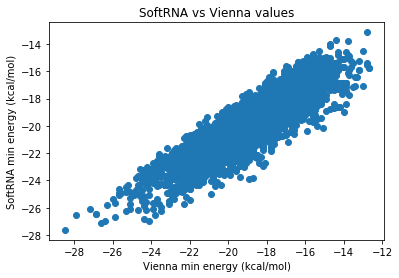

In [28]:
plt.scatter(list(big_table.vienna_opt), list(big_table.Soft))
plt.xlabel("Vienna min energy (kcal/mol)")
plt.ylabel("SoftRNA min energy (kcal/mol)")
plt.title("SoftRNA vs Vienna values")